In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.shape

(200000, 9)

In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(199999, 9)

In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [11]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

In [12]:
df.drop(['pickup_datetime', 'key'], axis=1, inplace=True)

In [13]:
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


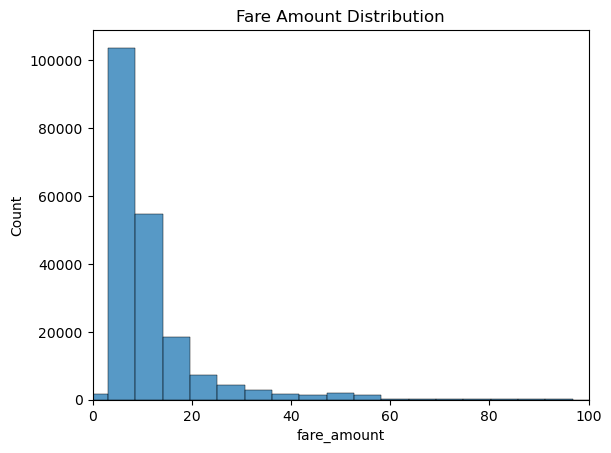

In [14]:
sns.histplot(df["fare_amount"],bins=100)
plt.xlim(0,100)
plt.title("Fare Amount Distribution")
plt.show()

In [15]:
# Keep fare between $2 and $100
df = df[(df['fare_amount'] > 2) & (df['fare_amount'] < 100)]

# Passenger count reasonable range
df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]

# Valid latitude and longitude ranges
df = df[(df['pickup_latitude'].between(-90, 90)) & (df['pickup_longitude'].between(-180, 180))]
df = df[(df['dropoff_latitude'].between(-90, 90)) & (df['dropoff_longitude'].between(-180, 180))]


In [16]:
df.shape

(199163, 12)

In [17]:
corr=df.corr()

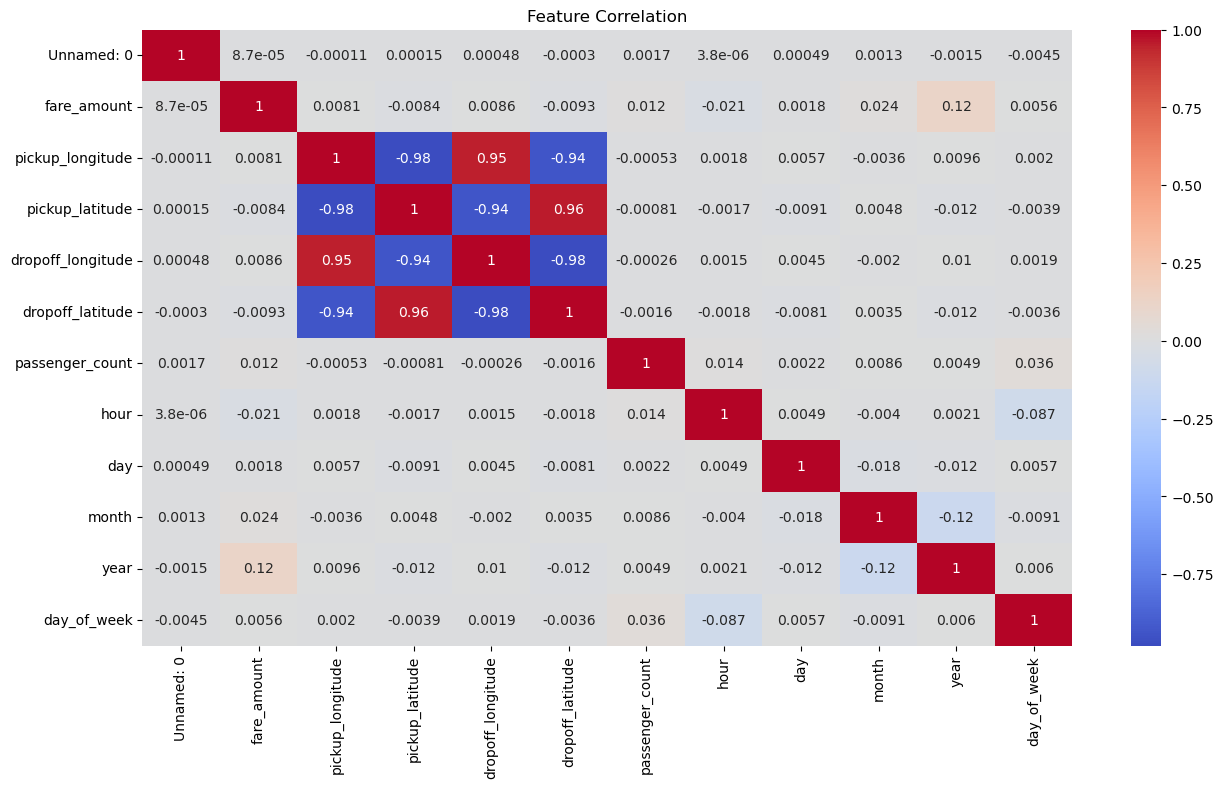

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [19]:
#!pip install geopy

In [20]:
from geopy.distance import geodesic

# Function to compute distance
def distance(row):
    start = (row['pickup_latitude'], row['pickup_longitude'])
    end = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(start, end).km

df['distance_km'] = df.apply(distance, axis=1)


In [44]:
features = ['passenger_count', 'hour', 'day', 'month', 'year', 'day_of_week', 'distance_km']
x = df[features]
y = df['fare_amount']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
lr=LinearRegression()

In [48]:
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
y_pred1=lr.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
rmse1=np.sqrt(mean_squared_error(y_test,y_pred1))
r2_1=r2_score(y_test,y_pred1)
print("Linear Regression - RMSE:", rmse1)
print("Linear Regression - R²:", r2_1)

Linear Regression - RMSE: 9.380362575371038
Linear Regression - R²: 0.017370533908033337


In [58]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred2=rf.predict(x_test)

In [60]:
rmse2=np.sqrt(mean_squared_error(y_test,y_pred2))
r2_2=r2_score(y_test,y_pred2)
print("Random Forest - RMSE:", rmse2)
print("Random Forest - R²:", r2_2)

Random Forest - RMSE: 4.47076666914511
Random Forest - R²: 0.7767895404974363


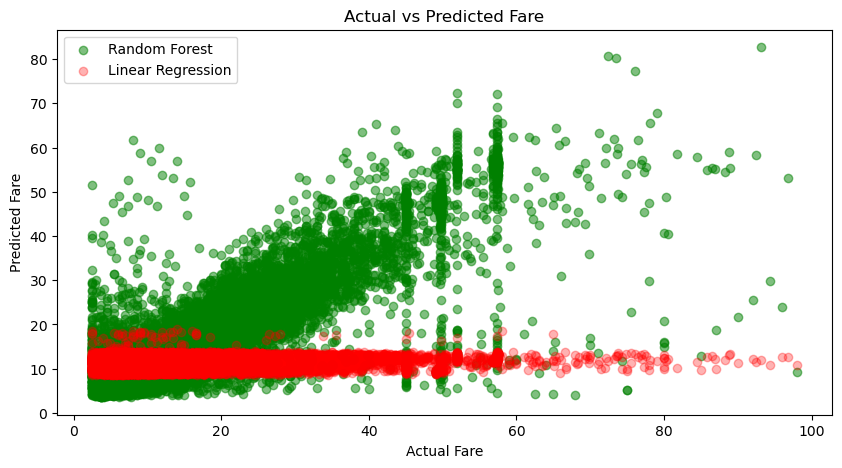

In [68]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred2, alpha=0.5, color='green', label="Random Forest")
plt.scatter(y_test, y_pred1, alpha=0.3, color='red', label="Linear Regression")
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.legend()
plt.title("Actual vs Predicted Fare")
plt.show()
